## **Analyzing the Iris dataset using Python**

### Import Python packages:

In [70]:

# packages will be updated according to the task progression.

import csv
# for dataframes 
import pandas as pd
# machine Learning Library that contains datasets.
import sklearn as skl 
# plotting library
import matplotlib.pyplot as plt
# python library for creating iterators to produce complex iterators.  
from itertools import combinations



### Output a summary of each Iris dataset variable to a single text file  


* Load dataset

* Import dataset previously downloaded

In [71]:
# I am correcting this load dataset part.
# I did donwload the dataset ann save it into the repository, the issue that I tried to read it from my local maching.
# the point of this notebook is to allow to others to use it thus run it without any loading issues.
# I now changed teh path from my local machine into the repository location where i previously downloaded the dataset'"iris dataset


# as we already imported pd and downloaded the dataset, I went to the folder where the file is saved, and through properties I did copy the file path.
# assigning a value 
#file_path = (r'C:\Users\marou\Desktop\pands\pands-project\iris dataset\iris.data')
# read the data
#iris_data = pd.read_csv(file_path )


In [72]:
# read iris dataset from current repository as a pandas data frame.
# the pandas frame will start with values, I need to add column names for better understanding
iris_data = pd.read_csv('iris dataset/iris.data')
#show
iris_data


,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [73]:
# identofy the columns names
# refering to the documentation file 'iris.names' in this repository. see atributes, which are corresponding to a list of columns names.
column_names = ['sepal length in cm' , 'sepal width in cm' , 'petal length in cm' , 'petal width in cm', 'class']
column_names


['sepal length in cm',
 'sepal width in cm',
 'petal length in cm',
 'petal width in cm',
 'class']

In [74]:
# now that I identified the column names, I can add them so I can identify the columns easily.
iris_data = pd.read_csv('iris dataset/iris.data', names= column_names)
# show dataframe
iris_data


,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Summary of each Iris dataset variable

In [75]:
# summary of the 4 variables of Iris dataset.
# The describe() method returns description of the data in the dataframe. As the dataframe contains numerical data, the description contains these information for each column: 
# count, mean, std, min, 25%, 50%, 75%, max
# https://www.w3schools.com/python/pandas/ref_df_describe.asp#:~:text=The%20describe()%20method%20returns,The%20average%20(mean)%20value.   (see .describe() method )
iris_data.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [76]:
# here I used for loop to actually loop through the columns in order to save them into txt files.
# reference : https://stackoverflow.com/questions/28218698/how-to-iterate-over-columns-of-a-pandas-dataframe#:~:text=We%20can%20use%20Python%27s%20list%20slicing%20easily%20to%20slice%20df.columns%20according%20to%20our%20needs.%20For%20eg%2C%20to%20iterate%20over%20all%20columns%20but%20the%20first%20one%2C%20we%20can%20do%3A

# I skip the class. I applied the negative indexing method.
for column in iris_data.columns[:-1]:  
    # summary of each column
    summary = iris_data[column].describe()
    # create a file for each column, add the file name and format
    # f-string formatting will generate a filename based on each column name.
    file_name = f"summary of {column}.txt"
    # open each file created previosuly, and overwrite the summary of each variable accordn=ingly
    with open(file_name, "w") as f:
        f.write(summary.to_string())

### Saving a histogram of each variable to png files


In [77]:
# to simplify the reading and coding, assign a variable for each feature of the data set.
sepal_length    = iris_data['sepal length in cm']
sepal_width     = iris_data['sepal width in cm']
petal_length    = iris_data['petal length in cm']
petal_width     = iris_data['petal width in cm']

In [78]:
# plot a histogram for each variable
# reference : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#:~:text=pyplot.hist(x%2C%20bins%3DNone%2C

# 1st histogram
plt.hist(sepal_length, ec='k', color='purple', alpha=0.6)
# add x label
# reference : https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend:~:text=in%20increasing%20order.-,Axis%20labels%2C%20title%2C%20and%20legend,-%23
plt.xlabel("Sepal Length in cm")
# add y label
plt.ylabel("count")
# add title
plt.title("Sepal Length Distribution")
# save histogram in .png file 
# reference : # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
plt.savefig("histogram of sepal length.png")
#clear the current figure.

plt.clf()

<Figure size 640x480 with 0 Axes>

In [79]:
# 2nd histogram
plt.hist(sepal_width, ec='k', color='green', alpha=0.6)
# add x label
plt.xlabel("Sepal Width in cm")
# add y label
plt.ylabel("count")
# add title
plt.title("Sepal Width Distribution")
# save
plt.savefig("histogram of sepal width.png")
#clear the current figure.
plt.clf()

<Figure size 640x480 with 0 Axes>

In [80]:
# 3rd histogram
plt.hist(petal_length, ec='k', color='magenta', alpha=0.6)
# add x label
plt.xlabel("Petal Length in cm")
# add y label
plt.ylabel("count")
# add title
plt.title("Petal Length Distribution")
# save
plt.savefig("histogram of petal length.png")
##clear the current figure.
plt.clf()

<Figure size 640x480 with 0 Axes>

In [81]:
# 4th histogram
plt.hist(petal_width, ec='k', color='orange', alpha=0.6)
# add x label
plt.xlabel("Petal Width in cm")
# add why label
plt.ylabel("count")
# add title
plt.title("Petal Width Distribution")
# save
plt.savefig("histogram of petal width.png")
#clear the current figure.
plt.clf()

<Figure size 640x480 with 0 Axes>

### Otput a scatter plot of each pair of variables

In [82]:
# finding how many pairs of variables before coding the scatter plots.
# I did manually find 6 pairs across al the 4 variables.
# I also looked up the documentation to try and find a function that generates the pairs count within a data set, this is helpful to manage larger data sets.

# The input list that I used to find the cominations.
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# imported in cell 1 itertools package to apply the combination methid into python.
# itertools helps to create and work with repeated or unique patterns from a given list.
# reference : https://docs.python.org/3/library/itertools.html#itertools.combinations
# reference : https://www.geeksforgeeks.org/python-itertools-combinations-function/

# to generate all possible combination.(length = 2) generates pairs where the order doesn't matter.
# reference : https://www.geeksforgeeks.org/python-itertools-combinations-function/#:~:text=%23%20generate%20all%20combinations%20of%20length%202
for i in combinations(columns, 2):
    print(i)

('sepal_length', 'sepal_width')
('sepal_length', 'petal_length')
('sepal_length', 'petal_width')
('sepal_width', 'petal_length')
('sepal_width', 'petal_width')
('petal_length', 'petal_width')


* Output a grid of 6 scatter plots corresponding to each pair of variables 

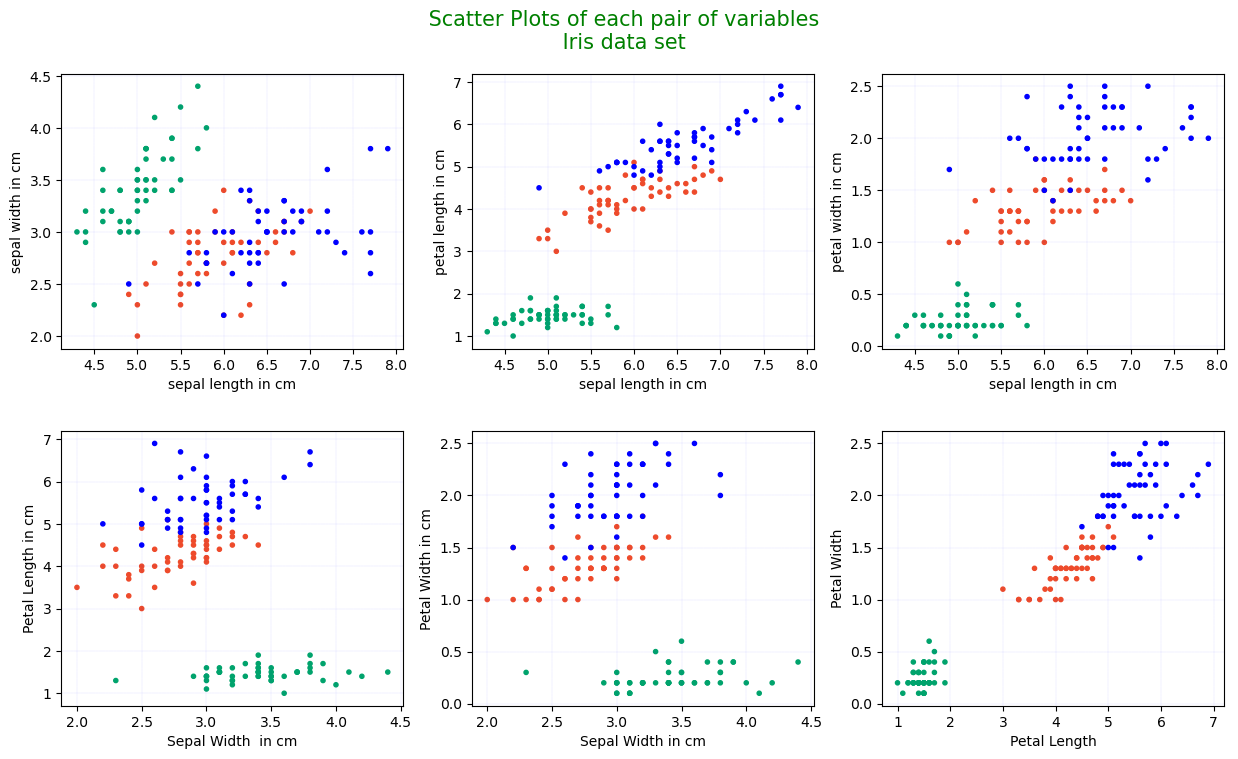

In [83]:
# create a colorolor dictionary
# reference : https://monayo.medium.com/creating-a-scatter-plot-where-points-are-colored-according-to-a-categorical-variable-in-python-c9624be2f39c#:~:text=species%20a%20color-,Dict_colors%20%3D%20%7B%27setosa%27%3A%27blue%27%2C%27versicolor%27%3A%27green%27%2C%27virginica%27%3A%27red%27%7D,-%23map%20species%20to

# assigning colors to species
# reference : https://htmlcolorcodes.com/colors/
species_colors = {
    'Iris-setosa': '#00A36C',
    'Iris-versicolor': '#EE4B2B',
    'Iris-virginica': 'blue'
}
# slice the class column to colors
# reference : https://monayo.medium.com/creating-a-scatter-plot-where-points-are-colored-according-to-a-categorical-variable-in-python-c9624be2f39c#:~:text=their%20respective%20colors-,colors%20%3D%20iris%5B%27Species%27%5D.map(Dict_colors),-%23creating%20a%20scatter
colors = iris_data['class'].map(species_colors)

# create a  grid of 2 rows 3 columns each (6 plots)
# reference : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
fig, axs = plt.subplots(2, 3, figsize=(15, 8), )

# add a fig titlesuptitle('3 iris species')
fig.suptitle(' Scatter Plots of each pair of variables \n Iris data set ', fontsize = 15, color = 'green', )
# subplots adjust parameters
# reference : https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.subplots_adjust.html
plt.subplots_adjust(hspace=0.3, top=0.9)

# 1st plot (Scatter plot of Sepal Length vs Sepal Width ) in 1st row, 1st , with color refernce to iris species
# reference : https://monayo.medium.com/creating-a-scatter-plot-where-points-are-colored-according-to-a-categorical-variable-in-python-c9624be2f39c#:~:text=plt.scatter(iris%5B%27Petal.Length%27%5D%2Ciris%5B%27Sepal.Length%27%5D%2Cc%3Dcolors)

axs[0, 0].scatter(sepal_length, sepal_width, marker='.',  c=colors)
# add a grid to simplfy repering the corresponding points
axs[0, 0].grid(color='blue', linestyle='--', linewidth=0.05)
# set x and y axis labels
axs[0, 0].set_xlabel('sepal length in cm')
axs[0, 0].set_ylabel('sepal width in cm')


# 2nd plot (Scatter plot of Sepal Length vs Petal Length) in 1st row, 2nd column
axs[0, 1].scatter(sepal_length, petal_length, marker='.',  c=colors)
axs[0, 1].grid(color='blue', linestyle='--', linewidth=0.05)
axs[0, 1].set_xlabel('sepal length in cm')
axs[0, 1].set_ylabel('petal length in cm')

# 3rd plot (Scatter plot of Sepal Length vs Petal Width) in 1st row, 3rd column
axs[0, 2].scatter(sepal_length, petal_width, marker='.',  c=colors)
axs[0, 2].grid(color='blue', linestyle='--', linewidth=0.05)
axs[0, 2].set_xlabel('sepal length in cm')
axs[0, 2].set_ylabel('petal width in cm')

# 4th plot (Scatter plot of Sepal Width vs Petal Length) in 2nd row 1st column
axs[1, 0].scatter(sepal_width, petal_length, marker='.',  c=colors)
axs[1, 0].grid(color='blue', linestyle='--', linewidth=0.05)
axs[1, 0].set_xlabel('Sepal Width  in cm')
axs[1, 0].set_ylabel('Petal Length in cm')

# 5th plot (Scatter plot of Sepal Width vs Petal Width ) in 2nd row 2nd column
axs[1, 1].scatter(sepal_width, petal_width, marker='.',  c=colors)
axs[1, 1].grid(color='blue', linestyle='--', linewidth=0.05)
axs[1, 1].set_xlabel('Sepal Width in cm')
axs[1, 1].set_ylabel('Petal Width in cm')

# 6th plot (Scatter plot of Petal Length vs Petal Width) in 2nd row, 3th column
axs[1, 2].scatter(petal_length, petal_width, marker='.',  c=colors)
axs[1, 2].grid(color='blue', linestyle='--', linewidth=0.05)
axs[1, 2].set_xlabel('Petal Length')
axs[1, 2].set_ylabel('Petal Width')

# show 
plt.show()


### Part 2 : 
#### Mypersonal approach to additional data processing methods

In [84]:
# individual summary for each variable 
# in the follwoing, I assigned a variable to each column name, and applied .describe() to output the descriptive stats for eachiris variable.
# sepal length summary
sepal_length = iris_data['sepal length in cm']
sepal_length_summary = sepal_length.describe()
# sepal width summary
sepal_width = iris_data['sepal width in cm']
sepal_width_summary = sepal_width.describe()
# petal length summary
petal_length = iris_data['petal length in cm']
petal_length_summary = petal_length.describe()
## petal width summary
petal_width = iris_data['petal width in cm']
petal_width_summary = petal_width.describe()

print(sepal_length_summary, sepal_width_summary, petal_length_summary, petal_width_summary)



count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal length in cm, dtype: float64 count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal width in cm, dtype: float64 count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal length in cm, dtype: float64 count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal width in cm, dtype: float64


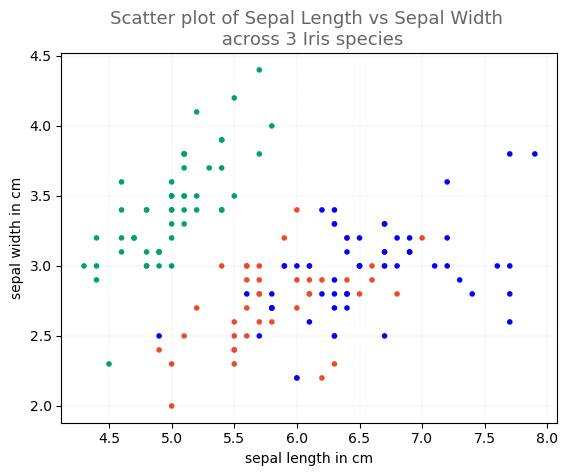

In [85]:
# create figure and axis for one variables pair ('sepal_length', 'sepal_width')
fig, ax = plt.subplots()
# add a grid to simplify the samples measurments reading. The grid function used is explained below.
plt.grid(color = 'blue',linestyle = '--', linewidth = 0.05, )
# set a title and labels
plt.title('Scatter plot of Sepal Length vs Sepal Width \n across 3 Iris species', c='black', fontsize=13, alpha=0.6)
# x label
ax.set_xlabel('sepal length in cm')
# y label
ax.set_ylabel('sepal width in cm')
# assign to the function a variable  called scatter 
scatter = ax.scatter(sepal_length, sepal_width, marker='.', c=colors)
# plt.clf()
# save
# plt.savefig("scatter plot of Sepal Length - Sepal Width.png")
